In [ ]:
!pip install pycaret

  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow 1.30.1 requires packaging<22, but you have packaging 23.1 which is incompatible.
plotnine 0.12.3 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
plotnine 0.12.3 requires pandas>=1.5.0, but you have pandas 1.4.4 which is incompatible.


In [ ]:
import pandas as pd

import pycaret
pycaret.__version__


'3.0.4'

## **----------Binary Classification----------**

In [ ]:
data1 = pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')

In [ ]:
data1.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(data = data1, target="Smoker")

,Description,Value
0,Session id,2116
1,Target,Smoker
2,Target type,Binary
3,Original data shape,"(253680, 22)"
4,Transformed data shape,"(253680, 22)"
5,Transformed train set shape,"(177576, 22)"
6,Transformed test set shape,"(76104, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6497,0.6940,0.4993,0.6327,0.5581,0.2745,0.2798,46.7510
lightgbm,Light Gradient Boosting Machine,0.6496,0.6952,0.4977,0.6333,0.5573,0.2743,0.2797,6.6000
gbc,Gradient Boosting Classifier,0.6471,0.6923,0.4877,0.6320,0.5505,0.2679,0.2740,17.3830
xgboost,Extreme Gradient Boosting,0.6468,0.6905,0.4982,0.6280,0.5556,0.2690,0.2740,23.9640
ada,Ada Boost Classifier,0.6393,0.6806,0.4915,0.6168,0.5471,0.2538,0.2583,4.9940
lr,Logistic Regression,0.6315,0.6696,0.4495,0.6153,0.5195,0.2322,0.2398,5.2730
ridge,Ridge Classifier,0.6310,0.0000,0.4435,0.6164,0.5158,0.2304,0.2386,0.2120
lda,Linear Discriminant Analysis,0.6310,0.6697,0.4446,0.6161,0.5164,0.2306,0.2386,0.9880
rf,Random Forest Classifier,0.6157,0.6468,0.5225,0.5729,0.5465,0.2144,0.2151,26.8560
qda,Quadratic Discriminant Analysis,0.6149,0.6518,0.4300,0.5899,0.4974,0.1975,0.2040,0.4970


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

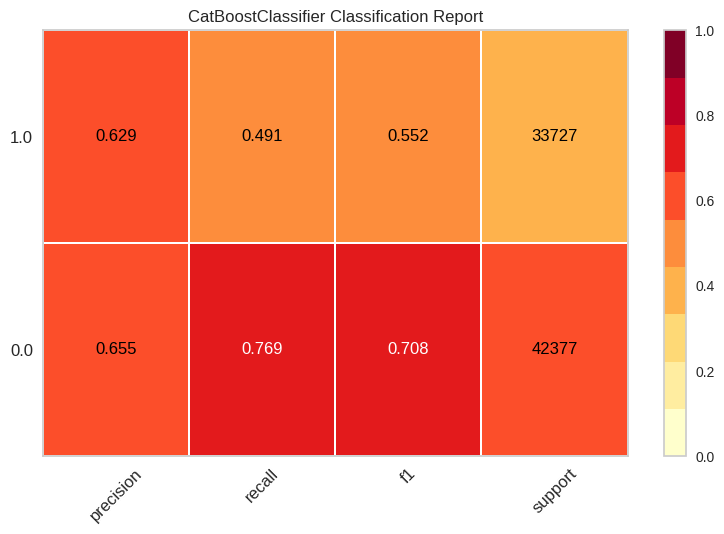

In [ ]:
plot_model(best_model, plot='class_report')

In [ ]:
save_model(best_model, 'binaryClassifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['HeartDiseaseorAttack', 'HighBP',
                                              'HighChol', 'CholCheck', 'BMI',
                                              'Stroke', 'Diabetes',
                                              'PhysActivity', 'Fruits',
                                              'Veggies', 'HvyAlcoholConsump',
                                              'AnyHealthcare', 'NoDocbcCost',
                                              'GenHlth', 'MentHlth', 'PhysHlth',
                                              'DiffWalk', 'Sex', 'Age',
                                              'Education',...
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('cat

## **----------Multiclassbest Classification----------**

In [ ]:
data2 = pd.read_csv('/content/bodyPerformance.csv')

In [ ]:
data2.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
data2.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [ ]:
data_train = data2.sample(frac=0.9, random_state= 120)

In [ ]:
data_train.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
9722,21.0,F,158.9,50.04,22.8,74.0,147.0,27.9,21.0,39.0,185.0,B
5750,59.0,M,178.1,76.30,20.7,77.0,129.0,39.7,13.8,40.0,192.0,C
8315,22.0,M,168.6,63.10,17.8,82.0,132.0,48.6,18.1,58.0,242.0,A
5951,21.0,F,160.6,48.90,23.8,54.0,125.0,24.8,19.4,47.0,195.0,B
12279,49.0,F,153.1,55.00,31.1,69.0,112.0,20.9,10.3,22.0,155.0,D


In [ ]:
data_test = data2.drop(data_train.index)

In [ ]:
data_test.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
10,42.0,M,169.2,65.4,19.3,63.0,110.0,43.5,16.0,68.0,211.0,A
15,45.0,F,159.0,63.1,30.9,93.0,144.0,34.1,19.0,30.0,155.0,A
19,21.0,F,162.7,47.2,18.9,78.0,133.0,25.4,20.5,36.0,137.0,B
23,44.0,M,170.0,63.3,12.9,65.0,115.0,44.5,11.6,49.0,196.0,B
28,36.0,M,176.0,81.3,24.5,81.0,139.0,46.2,8.1,54.0,232.0,C


In [ ]:
data_train.reset_index(drop=True, inplace=True)

In [ ]:
data_train.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,21.0,F,158.9,50.04,22.8,74.0,147.0,27.9,21.0,39.0,185.0,B
1,59.0,M,178.1,76.30,20.7,77.0,129.0,39.7,13.8,40.0,192.0,C
2,22.0,M,168.6,63.10,17.8,82.0,132.0,48.6,18.1,58.0,242.0,A
3,21.0,F,160.6,48.90,23.8,54.0,125.0,24.8,19.4,47.0,195.0,B
4,49.0,F,153.1,55.00,31.1,69.0,112.0,20.9,10.3,22.0,155.0,D


In [ ]:
data_test.reset_index(drop=True, inplace=True)

In [ ]:
data_test.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,42.0,M,169.2,65.4,19.3,63.0,110.0,43.5,16.0,68.0,211.0,A
1,45.0,F,159.0,63.1,30.9,93.0,144.0,34.1,19.0,30.0,155.0,A
2,21.0,F,162.7,47.2,18.9,78.0,133.0,25.4,20.5,36.0,137.0,B
3,44.0,M,170.0,63.3,12.9,65.0,115.0,44.5,11.6,49.0,196.0,B
4,36.0,M,176.0,81.3,24.5,81.0,139.0,46.2,8.1,54.0,232.0,C


In [ ]:
mclf = setup(data=data_train, target="age", session_id=122)

,Description,Value
0,Session id,122
1,Target,age
2,Target type,Multiclass
3,Target mapping,"21.0: 0, 22.0: 1, 23.0: 2, 24.0: 3, 25.0: 4, 26.0: 5, 27.0: 6, 28.0: 7, 29.0: 8, 30.0: 9, 31.0: 10, 32.0: 11, 33.0: 12, 34.0: 13, 35.0: 14, 36.0: 15, 37.0: 16, 38.0: 17, 39.0: 18, 40.0: 19, 41.0: 20, 42.0: 21, 43.0: 22, 44.0: 23, 45.0: 24, 46.0: 25, 47.0: 26, 48.0: 27, 49.0: 28, 50.0: 29, 51.0: 30, 52.0: 31, 53.0: 32, 54.0: 33, 55.0: 34, 56.0: 35, 57.0: 36, 58.0: 37, 59.0: 38, 60.0: 39, 61.0: 40, 62.0: 41, 63.0: 42, 64.0: 43"
4,Original data shape,"(12054, 12)"
5,Transformed data shape,"(12054, 15)"
6,Transformed train set shape,"(8437, 15)"
7,Transformed test set shape,"(3617, 15)"
8,Ordinal features,1
9,Numeric features,9


In [ ]:
best2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.1096,0.7362,0.1096,0.0786,0.0728,0.0674,0.0700,0.2690
lr,Logistic Regression,0.1047,0.7136,0.1047,0.0715,0.0654,0.0603,0.0631,7.7590
ridge,Ridge Classifier,0.1007,0.0000,0.1007,0.0334,0.0371,0.0476,0.0562,0.3520
catboost,CatBoost Classifier,0.0940,0.7114,0.0940,0.0809,0.0829,0.0584,0.0587,124.8550
rf,Random Forest Classifier,0.0896,0.6772,0.0896,0.0725,0.0740,0.0508,0.0513,4.5070
et,Extra Trees Classifier,0.0894,0.6717,0.0894,0.0725,0.0756,0.0513,0.0517,6.4780
xgboost,Extreme Gradient Boosting,0.0881,0.6830,0.0881,0.0731,0.0764,0.0513,0.0516,37.0070
lightgbm,Light Gradient Boosting Machine,0.0859,0.6783,0.0859,0.0673,0.0703,0.0457,0.0462,31.7620
gbc,Gradient Boosting Classifier,0.0839,0.6896,0.0839,0.0677,0.0706,0.0468,0.0472,78.9700
dummy,Dummy Classifier,0.0728,0.5000,0.0728,0.0053,0.0099,0.0000,0.0000,0.4030


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_0, *['  '], **{})
chart

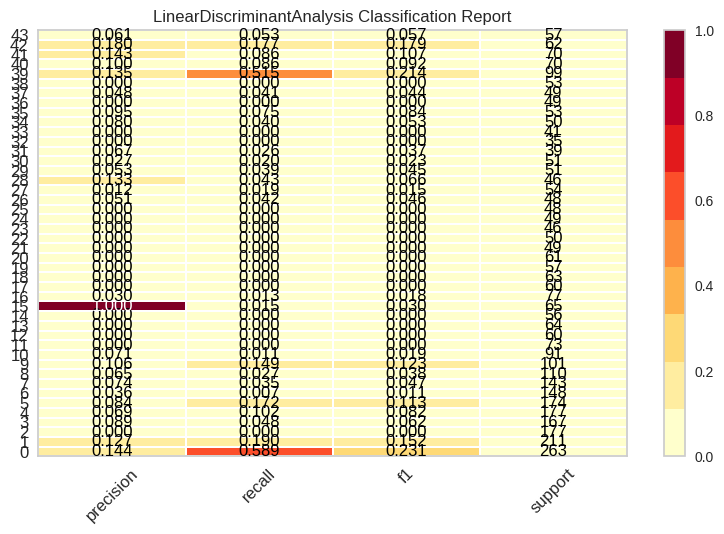

In [ ]:
plot_model(best2, plot = 'class_report')

In [ ]:
save_model(best2, 'multiClassifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['height_cm', 'weight_kg',
                                              'body fat_%', 'diastolic',
                                              'systolic', 'gripForce',
                                              'sit and bend forward_cm',
                                              'sit-ups counts',
                                              'broad jump_cm'],
                                     tra...
                                                               return_df=True,
                                                               use_cat_names=True,
                                              

# **----------Regression----------**

In [ ]:
data3 = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
data3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
from pycaret.regression import *

In [ ]:
reg = setup(data=data3, target="price")

,Description,Value
0,Session id,3541
1,Target,price
2,Target type,Regression
3,Original data shape,"(21613, 21)"
4,Transformed data shape,"(21613, 21)"
5,Transformed train set shape,"(15129, 21)"
6,Transformed test set shape,"(6484, 21)"
7,Numeric features,19
8,Categorical features,1
9,Preprocess,True


In [ ]:
best3 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,63684.1307,14081247909.9856,117505.9381,0.8976,0.1648,0.1220,7.7660
lightgbm,Light Gradient Boosting Machine,68274.7804,17097504601.0837,129357.3654,0.8756,0.1730,0.1291,1.8450
et,Extra Trees Regressor,70842.5213,17663800315.4630,131751.3216,0.8692,0.1812,0.1338,6.5460
xgboost,Extreme Gradient Boosting,70264.5266,18772795699.2000,135645.7562,0.8633,0.1770,0.1314,2.7460
rf,Random Forest Regressor,71152.0705,18617150466.1516,135395.0367,0.8624,0.1799,0.1336,13.9760
gbr,Gradient Boosting Regressor,77543.5987,18728485971.8073,136104.7812,0.8602,0.1920,0.1484,4.2990
ridge,Ridge Regression,127168.7958,41507203067.0693,203134.4633,0.6928,0.4177,0.2584,0.1630
lasso,Lasso Regression,127186.9969,41505935557.2554,203134.6395,0.6928,0.4139,0.2585,0.5570
lr,Linear Regression,127187.8406,41505853632.3553,203134.5316,0.6928,0.4140,0.2585,0.3400
br,Bayesian Ridge,127169.4875,41508991164.6242,203138.6512,0.6928,0.4178,0.2584,0.2780


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

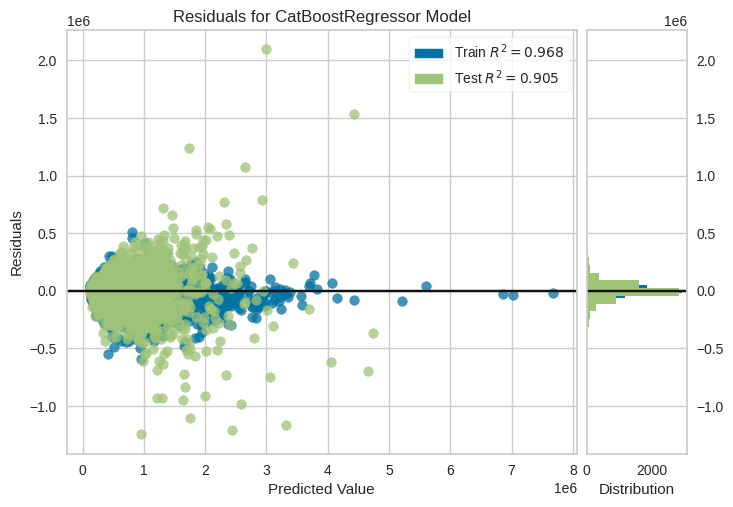

In [ ]:
plot_model(best3, plot = 'residuals')

In [ ]:
save_model(best3, 'regressor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'bedrooms', 'bathrooms',
                                              'sqft_living', 'sqft_lot',
                                              'floors', 'waterfront', 'view',
                                              'condition', 'grade', 'sqft_above',
                                              'sqft_basement', 'yr_built',
                                              'yr_renovated', 'zipcode', 'lat',
                                              'long', 'sqft_living15',
                                              'sqft_lot15'],
                                     transformer=SimpleImpu...
                                                               verbose='deprecated'))),
                 ('rest_encoding',
                  TransformerWrapper(exclude=None, include=['date'],
       

## ----------Clustering----------

In [ ]:
data4 = pd.read_csv('/content/CC GENERAL.csv')

In [ ]:
data4.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data4_train = data4.sample(frac=0.9, random_state=111)

In [ ]:
data4_test = data4.drop(data4_train.index)

In [ ]:
data4_train.reset_index(drop=True, inplace=True)

In [ ]:
data4_test.reset_index(drop=True, inplace=True)

In [ ]:
from pycaret.clustering import *

In [ ]:
clust = setup(data=data4_train, normalize=True, ignore_features=["CUST_ID"], session_id=144)

,Description,Value
0,Session id,144
1,Original data shape,"(8055, 18)"
2,Transformed data shape,"(8055, 17)"
3,Ignore features,1
4,Numeric features,17
5,Rows with missing values,3.6%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [ ]:
kmeans = create_model("kmeans")

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1988,1433.7682,1.5731,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
print(kmeans)

KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init='warn', random_state=144, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans, plot='cluster')

In [ ]:
save_model(kmeans, 'kmeansCustering')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['BALANCE', 'BALANCE_FREQUENCY',
                                              'PURCHASES', 'ONEOFF_PURCHASES',
                                              'INSTALLMENTS_PURCHASES',
                                              'CASH_ADVANCE',
                                              'PURCHASES_FREQUENCY',
                                              'ONEOFF_PURCHASES_FREQUENCY',
                                              'PURCHASES_INSTALLMENTS_FREQUENCY',
                                              'CASH_ADVANCE_FREQUENCY',
                                              'CASH_ADVANCE_TRX',
                                              '...
                                                               missing_values=nan,
                                                               strate

# ----------Anomaly Detection----------

In [ ]:
data5 = pd.read_csv('/content/reduced_dataset.csv')

In [ ]:
data5.describe()

,Unnamed: 0,value
count,2000.000000,2000.000000
mean,5115.951000,15057.598000
std,2984.794083,6992.422699
min,0.000000,8.000000
25%,2513.750000,9943.000000
50%,5119.500000,16700.000000
75%,7709.000000,19733.250000
max,10318.000000,35212.000000


In [ ]:
from pycaret.anomaly import *

In [ ]:
detector = setup(data5, session_id = 222)

,Description,Value
0,Session id,222
1,Original data shape,"(2000, 3)"
2,Transformed data shape,"(2000, 2002)"
3,Numeric features,2
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [ ]:
forest1 = create_model('iforest')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
plot_model(forest1, plot = 'tsne')

In [ ]:
save_model(forest1, 'anomalymodel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Unnamed: 0', 'value'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['timestamp'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['timestamp'],
                                     transformer=OneHotEncoder(cols=['timestamp'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('trained_model',
                  IForest(behaviour='new', bootstrap=False, contamination=0.05,
     max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
     random_state=222, verbose=0))

## ----------Association Rules Mining----------

In [ ]:
!pip install pycaret==3.0.0.rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.1/538.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 77.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: pandas
    Found existing in

In [ ]:
data6 = pd.read_csv('/content/Groceries_dataset.csv')

In [ ]:
data6.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [ ]:
data6.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
from pycaret.arules import *

In [ ]:
arule = setup(data6, transaction_id='Member_number', item_id='itemDescription')

Description,Value
session_id,3445
# Transactions,3898
# Items,167
Ignore Items,None


In [ ]:
rul = create_model()
rul.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(other vegetables, bottled water)",(whole milk),0.0939,0.4582,0.0562,0.5984,1.3059,0.0132,1.3490,0.2585
1,"(yogurt, other vegetables)",(whole milk),0.1203,0.4582,0.0718,0.5970,1.3030,0.0167,1.3445,0.2643
2,"(rolls/buns, yogurt)",(whole milk),0.1113,0.4582,0.0659,0.5922,1.2924,0.0149,1.3285,0.2546
3,"(rolls/buns, other vegetables)",(whole milk),0.1467,0.4582,0.0821,0.5594,1.2210,0.0149,1.2298,0.2121
4,"(soda, yogurt)",(whole milk),0.0975,0.4582,0.0544,0.5579,1.2176,0.0097,1.2255,0.1980


In [ ]:
plot_model(rul)

# ----------Time Series Forecasting----------

continued in other colab network!